<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd

In [0]:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa_df = pd.read_csv(source_url)
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
iowa_df.shape

(1460, 81)

In [0]:
iowa_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
iowa_df.describe(exclude = 'number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [0]:
iowa_df['LotArea'].describe()


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [0]:
pd.set_option('display.max_rows',100)
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [0]:
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(3)

,BedroomAbvGr,Fireplaces
233,3,0
147,3,1
115,2,1


In [0]:
iowa_df['fire place is hot'] = iowa_df['Fireplaces'].copy()
iowa_df[['fire place is hot','Fireplaces']].head(2)

,fire place is hot,Fireplaces
0,0,0
1,1,1


In [0]:
iowa_df['LotFrontage'].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

In [0]:
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
import numpy as np

In [0]:
type(np.nan)

float

In [0]:
iowa_df['LotFrontage'].isnull().sum()

259

In [0]:
iowa_df['LotFrontage'].dropna(inplace=True)
iowa_df['LotFrontage'].isnull().sum()

0

In [0]:
small_df = iowa_df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']].copy()
small_df.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
270,1095,1095,844,266000
475,970,970,0,132500
807,1324,1072,504,223500


In [0]:
small_df['TotalSF'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df ['2ndFlrSF']
small_df.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706


In [0]:
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
iowa_df[['LotShape','Alley','Street','SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [0]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [0]:
iowa_df['NormalCondition'] = np.where(iowa_df['SaleCondition'] == 'Normal', 'Yes','No')
iowa_df['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [0]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
iowa_df['LotShape3'] = iowa_df['LotShape'].map({'Reg' : 'Regular', 'IR1': 'Irregular', 'IR2':'Other','IR3':'other'})

In [0]:
iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         41
other         10
Name: LotShape3, dtype: int64

In [0]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
iowa_df['Neighborhood'].value_counts().head(5)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: Neighborhood, dtype: int64

In [0]:
iowa_df['top_neighbors'] = 'All others'
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'top_neighbors']= 'north ames neighbors'
iowa_df.loc[iowa_df['Neighborhood']== 'CollgCr', 'top_neighbors'] = 'creek neighbors'
iowa_df.loc[iowa_df['Neighborhood']== 'Gilbert', 'top_neighbors'] = 'gilbert neighbors'
iowa_df['top_neighbors'].value_counts()

All others              1006
north ames neighbors     225
creek neighbors          150
gilbert neighbors         79
Name: top_neighbors, dtype: int64

In [0]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])

LotShape3,Irregular,Other,Regular,other
top_neighbors,,,,
All others,312,23,667,4
creek neighbors,53,10,86,1
gilbert neighbors,53,7,15,4
north ames neighbors,66,1,157,1


In [0]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,other,All
top_neighbors,,,,,
All others,312,23,667,4,1006
creek neighbors,53,10,86,1,150
gilbert neighbors,53,7,15,4,79
north ames neighbors,66,1,157,1,225
All,484,41,925,10,1460


In [0]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], margins=True, normalize = 'index')

LotShape3,Irregular,Other,Regular,other
top_neighbors,,,,
All others,0.310139,0.022863,0.663022,0.003976
creek neighbors,0.353333,0.066667,0.573333,0.006667
gilbert neighbors,0.670886,0.088608,0.189873,0.050633
north ames neighbors,0.293333,0.004444,0.697778,0.004444
All,0.331507,0.028082,0.633562,0.006849


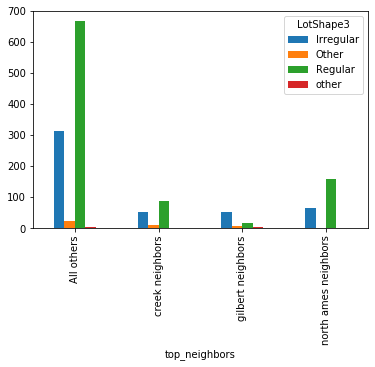

In [0]:
myresult = pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])
myresult.plot(kind= 'bar');

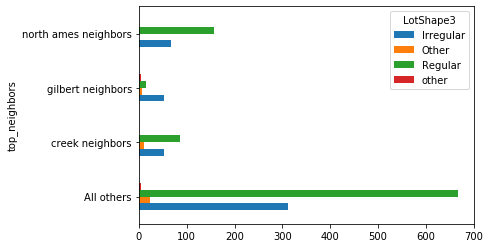

In [0]:
myresult = pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])
myresult.plot(kind= 'barh');

Working with Strings

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-15 01:34:43--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [<=>                 ]  21.71M   775KB/s    in 29s     

2020-03-15 01:35:12 (770 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [0]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
loans_df.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title       emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant 2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation 079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80               1         

In [0]:
loans_df.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   3024.63 3024.63 2713.51 2713.51 1975.37 738.14  0.0 0.0 0.0 Feb-2020 169.83 Mar-2020 Jan-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5959.76 5810.77 5227.52 5096.83 4040.24 1187.28 0.0 0.0 0.0 Feb-2020 327.68 Mar-2020 Jan-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   6168.49 6168.49 5687.89 5687.89 3831.51 1856.38 0.0 0.0 0.0 Feb-2020 356.08 Mar-2020 Jan-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2048833825 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 819375497  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [0]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv',skiprows=1, skipfooter=2, engine='python')
loans_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,6168.49,6168.49,5687.89,5687.89,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loans_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
pd.set_option('display.max_rows',100)
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [0]:
loans_df['int_rate'].head()

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object

In [0]:
loans_df['int_rate'][3]

' 14.47%'

In [0]:
float((loans_df['int_rate'][3]).strip('%').strip())

14.47

In [0]:
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [0]:
myfunc(' 14.47% ')

14.47

In [0]:
type(myfunc(' 14.47% '))

float

In [0]:
new_list = []

In [0]:
for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [0]:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [0]:
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [0]:
loans_df['int_rate_cleaned'] = pd.Series(new_list)
loans_df[['int_rate','int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,16.14
1,11.80%,11.80
2,11.31%,11.31
3,14.47%,14.47
4,27.27%,27.27


In [0]:
loans_df[['int_rate','int_rate_cleaned']].dtypes

int_rate             object
int_rate_cleaned    float64
dtype: object

In [0]:
loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate','int_rate_cleaned','int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned,int_rate_cleaned2
0,16.14%,16.14,16.14
1,11.80%,11.80,11.80
2,11.31%,11.31,11.31
3,14.47%,14.47,14.47
4,27.27%,27.27,27.27


In [0]:
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [0]:
loans_df['emp_title'].value_counts(dropna=False)[:5]

NaN                 20922
Teacher              2088
Manager              1771
Registered Nurse      950
Driver                924
Name: emp_title, dtype: int64

In [0]:
len(loans_df['emp_title'].unique())

43852

In [0]:
loans_df['emp_title'].nunique()

43851

In [0]:
loans_df['emp_title'].isnull().sum()

20922

In [0]:
import numpy as np
examples = ['owner', 'Supervisor', 'Project Manager', np.nan]

In [0]:
print(type('Supervisor'))
isinstance('Supervisor',str)

<class 'str'>


True

In [0]:
' superVIsor  '.title().strip()

'Supervisor'

In [0]:
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return 'unknown'

In [0]:
clean_title('  superVIsor ')

'Supervisor'

In [0]:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [0]:
loans_df[['emp_title','emp_title_cleaned']].sample(5)

,emp_title,emp_title_cleaned
40399,Vice President,Vice President
99486,Foreman,Foreman
100692,Claims Management Analyst,Claims Management Analyst
47525,Management Analyst,Management Analyst
34031,NaN,unknown


In [0]:
loans_df['emp_title_cleaned'].value_counts().head()

unknown             20922
Teacher              2553
Manager              2393
Registered Nurse     1416
Driver               1258
Name: emp_title_cleaned, dtype: int64

In [0]:
loans_df['emp_title_cleaned'].nunique()

34877

In [0]:
loans_df['new_emp_title'] = 'All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title']='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title']='Teacher'
loans_df['new_emp_title'].value_counts()

All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [0]:
loans_df['emp_title_cleaned'].isnull().sum()

0

In [0]:
loans_df.columns[:10]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')

In [0]:
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
mylist=[]
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]

In [0]:
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
loans_df['issue_d'].dtype

dtype('O')

In [0]:
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

In [0]:
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'],infer_datetime_format=True)

In [0]:
loans_df[['issue_d','new_issue_d']].tail(15)

,issue_d,new_issue_d
128269,Oct-2018,2018-10-01
128270,Oct-2018,2018-10-01
128271,Oct-2018,2018-10-01
128272,Oct-2018,2018-10-01
128273,Oct-2018,2018-10-01
128274,Oct-2018,2018-10-01
128275,Oct-2018,2018-10-01
128276,Oct-2018,2018-10-01
128277,Oct-2018,2018-10-01
128278,Oct-2018,2018-10-01


In [0]:
type(loans_df['new_issue_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
print(loans_df['new_issue_d'].dtype)

datetime64[ns]


In [0]:
loans_df['new_issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [0]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d','new_issue_d','year','month','weekday']].sample(5)

,issue_d,new_issue_d,year,month,weekday
38420,Dec-2018,2018-12-01,2018,12,5
114667,Oct-2018,2018-10-01,2018,10,0
17185,Dec-2018,2018-12-01,2018,12,5
75054,Nov-2018,2018-11-01,2018,11,3
92581,Oct-2018,2018-10-01,2018,10,0


In [0]:
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head()

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


In [0]:
loans_df['day_diff'] = loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']
loans_df[['issue_d','last_credit_pull_d','day_diff']].head()

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days


In [0]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [0]:
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

# **Convert term column from string to integer**

In [0]:
loans_df['term'].value_counts()


 36 months    88084
 60 months    40200
Name: term, dtype: int64

In [0]:
loans_df.term.dtypes

dtype('O')

In [0]:
loans_df.loc[loans_df['term']==' 36 months','term2']= 36
loans_df.loc[loans_df['term']==' 60 months','term2']= 60

In [0]:
loans_df['term2'].value_counts()

36    88084
60    40200
Name: term2, dtype: int64

In [0]:
loans_df['term2'].dtypes

dtype('int64')

In [0]:
loans_df[['term','term2']].head()

,term,term2
0,60 months,60
1,36 months,36
2,36 months,36
3,60 months,60
4,60 months,60


# **Make a column named loan_status_is_great**

In [0]:
loans_df['loan_status'].value_counts()

Current               92485
Fully Paid            24821
Charged Off            6766
Late (31-120 days)     2210
In Grace Period        1405
Late (16-30 days)       486
Default                 111
Name: loan_status, dtype: int64

In [0]:
#loans_df['loan_status_is_great'] = int(0)
loans_df['loan_status_is_great']= loans_df['loan_status'].map({'Current':int(1), 
                                                               'Fully Paid':int(1),
                                                               'Charged Off':int(0),
                                                               'Late (31-120 days)':int(0),
                                                               'In Grace Period':int(0),
                                                               'Late (16-30 days)':int(0),
                                                               'Default':int(0)})

In [0]:
loans_df['loan_status_is_great'].value_counts()

1    117306
0     10978
Name: loan_status_is_great, dtype: int64

In [0]:
loans_df['loan_status_is_great'].dtypes

dtype('int64')

# **Make last_pymnt_d_month and last_pymnt_d_year columns**

In [0]:
loans_df['last_pymnt_d'].head()

0    May-2019
1    Feb-2020
2    Feb-2019
3    Oct-2019
4    Feb-2020
Name: last_pymnt_d, dtype: object

In [0]:
loans_df['last_pymnt_d'].value_counts(dropna=False)

Feb-2020    93927
Jul-2019     3141
Jan-2020     3028
Dec-2019     2789
Sep-2019     2755
Oct-2019     2741
Aug-2019     2712
May-2019     2547
Nov-2019     2430
Apr-2019     2352
Jun-2019     2284
Mar-2019     1980
Feb-2019     1915
Jan-2019     1561
Dec-2018     1052
Nov-2018      678
Oct-2018      233
NaN           159
Name: last_pymnt_d, dtype: int64

In [0]:
loans_df['last_pymnt_d'].fillna(0,inplace=True)

In [148]:
loans_df['last_pymnt_d'].isnull().sum()

0

In [0]:
loans_df['new_last_pymnt_d'] = pd.to_datetime(loans_df['last_pymnt_d'], infer_datetime_format=True)

In [150]:
type(loans_df['new_last_pymnt_d'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
loans_df['last_pymnt_d_month'] = loans_df['new_last_pymnt_d'].dt.month
loans_df['last_pymnt_d_year'] = loans_df['new_last_pymnt_d'].dt.year

In [152]:
loans_df['last_pymnt_d_month'].value_counts(dropna=False)

2     95842
1      4748
12     3841
7      3141
11     3108
10     2974
9      2755
8      2712
5      2547
4      2352
6      2284
3      1980
Name: last_pymnt_d_month, dtype: int64

In [153]:
loans_df[['last_pymnt_d','last_pymnt_d_month','last_pymnt_d_year']].head(3)

,last_pymnt_d,last_pymnt_d_month,last_pymnt_d_year
0,May-2019,5,2019
1,Feb-2020,2,2020
2,Feb-2019,2,2019


In [156]:
print(type(loans_df['last_pymnt_d_month'][0]))
print(type(loans_df['last_pymnt_d_year'][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01